# Lab #10

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance


In [2]:
TD_gaussDf = pd.read_csv("data/2D_gauss_clusters.txt")

In [3]:
TD_gaussDf.head(2)

x       y
0  845753  636607
1  812954  643720

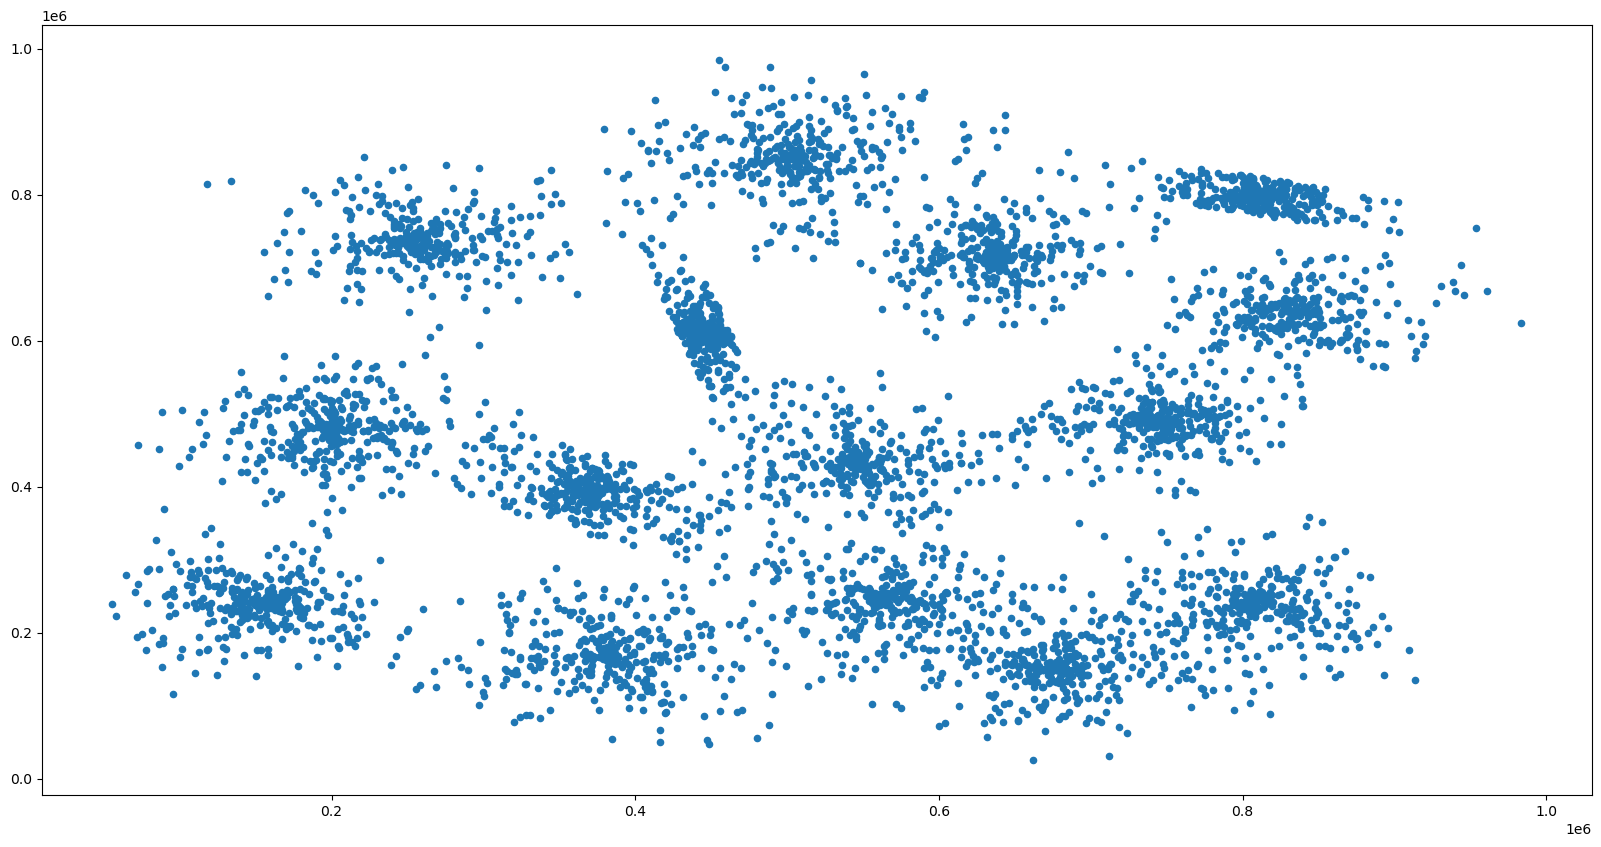

In [4]:
plt.figure(figsize=(20,10))
plt.scatter(TD_gaussDf['x'], TD_gaussDf['y'], s =20)
plt.show()

There are 15 clusters, as we expected.
We can choose among various algorithms:


1. K-means
2. Hierarchical Clustering
3. DBSCAN

Since we already know the total number of clusters we opt for **K-means**.



We try to implement it ourself

In [5]:
class KMeans:
    def __init__(self, n_clusters, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.labels = None

    #choose n_clusters random points among X, those are the centroids
    def createFirstCentroids(self, X):
        ind = np.random.choice(len(X), size = self.n_clusters, replace = False)
        self.centroids = X[ind]

    #assign all the points of X to the current centroids. Update self.labels
    def assignPointsToCentroids(self, X):
        labels = []
        for row in X:
            dists = []
            for centroid in self.centroids:
                dists.append(distance.euclidean(row, centroid))
            labels.append(dists.index(min(dists)))
        self.labels = labels

    #recalcualte centroids given X
    def recalcCentroids(self, X):
        for cluster in range(self.n_clusters):
            #creo un sottoinsieme di punti di X che sono stati assegnati al cluster in considerazione
            indices = [i for i in range(len(self.labels)) if self.labels[i] == cluster]
            subX =X[indices]
            self.centroids[cluster] = np.average(subX, axis=0)
  
    def fit_predict(self, X):
        """Run the K-means clustering on X.
        :param X: input data points, array, shape = (N,C).
        :return: labels : array, shape = N.
        """ 
        self.createFirstCentroids(X)
        for iter in range(self.max_iter):
            prevCentr = self.centroids
            self.assignPointsToCentroids(X)
            self.recalcCentroids(X)
            newCentr = self.centroids
            if np.array_equal(prevCentr, newCentr):
                break

        self.assignPointsToCentroids(X)
        return np.array(self.labels)

Test of the class

In [6]:
X=np.array([[1,2],
            [1,3],
            [9,9],
            [2,2]])
y = np.array([1,0,2,1])
ind = np.argwhere(y==1)
X[ind].shape

(2, 1, 2)

In [7]:
X=np.array([[1,2],
            [1,3],
            [9,9],
            [2,2]])
km = KMeans(n_clusters=2, max_iter = 10)

In [8]:
km.createFirstCentroids(X)
km.centroids

array([[1, 2],
       [2, 2]])

In [9]:
km.assignPointsToCentroids(X)
km.labels

[0, 0, 1, 1]

In [10]:
X=np.array([[1,2],
            [1,3],
            [25,7],
            [2,2],
            [2,4],
            [25,6],
            [30,6],
            [31,7]])

km = KMeans(n_clusters=2, max_iter = 10)

plt.scatter(X.T[0], X.T[1], c = km.fit_predict(X))
plt.show()

Using the class on the 2D_gauss_clusters

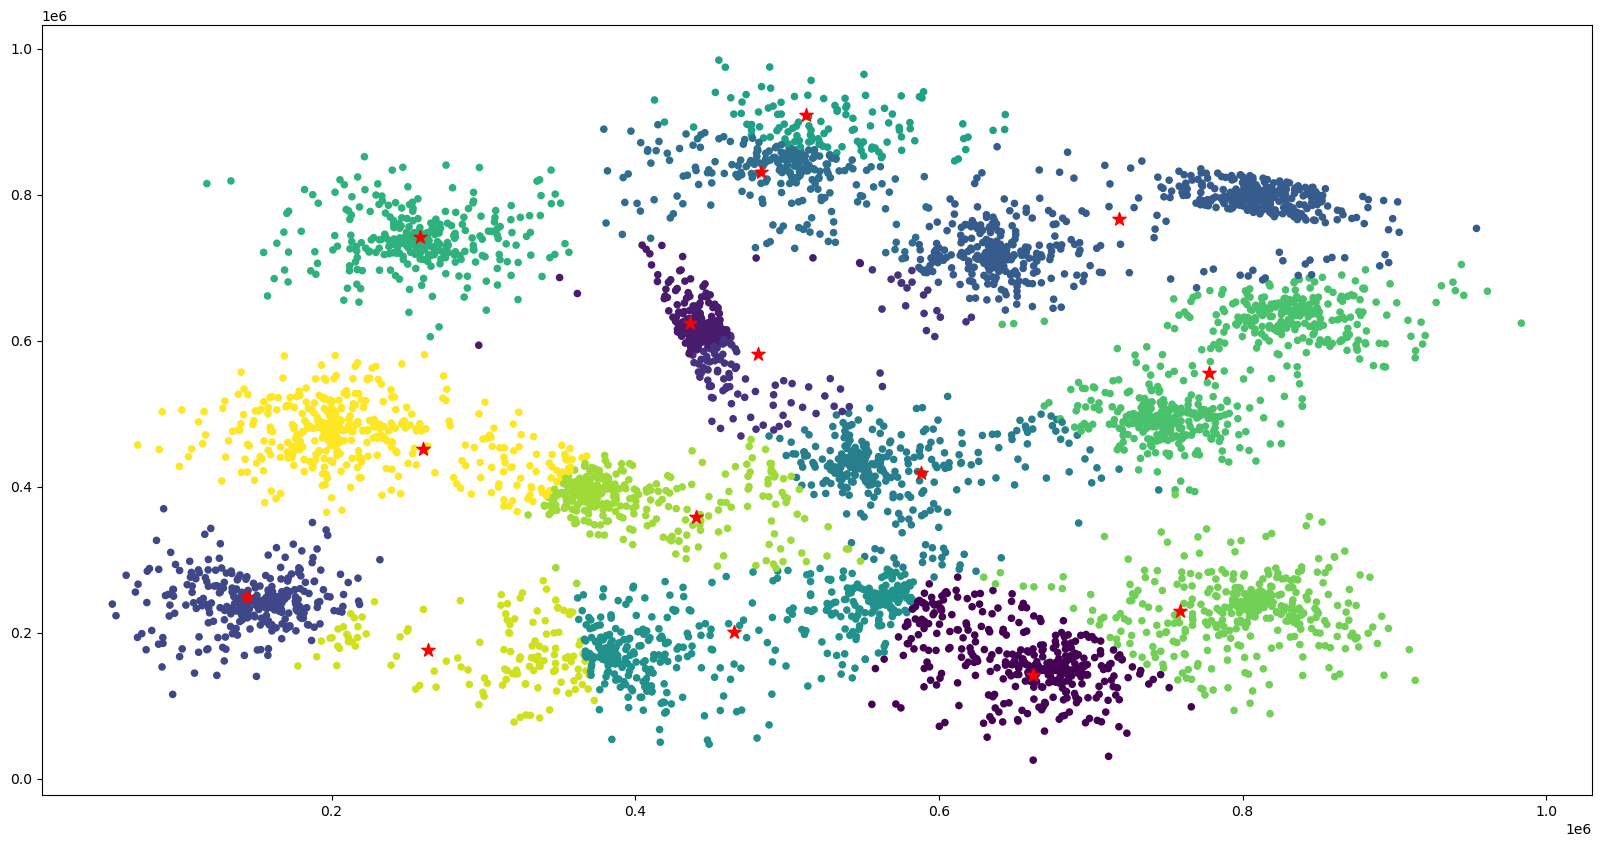

In [11]:
kmTD_gaussDf = KMeans(n_clusters = 15)
labels = kmTD_gaussDf.fit_predict(TD_gaussDf.values)

plt.figure(figsize=(20,10))
plt.scatter(TD_gaussDf['x'], TD_gaussDf['y'], s =20, c = labels)
plt.scatter(np.array(kmTD_gaussDf.centroids).T[0], np.array(kmTD_gaussDf.centroids).T[1], c='red', marker = "*", s = 100)
plt.show()

In [12]:
chameleon_clustersDf = pd.read_csv('data/chameleon_clusters.txt')

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(chameleon_clustersDf['x'], chameleon_clustersDf['y'], s =20)
plt.show()

In [14]:
kmChameleon_clusters = KMeans(n_clusters = 6, max_iter = 30)
labels = kmChameleon_clusters.fit_predict(chameleon_clustersDf.values)

plt.figure(figsize=(20,10))
plt.scatter(chameleon_clustersDf['x'], chameleon_clustersDf['y'], s =20, c = labels)
plt.show()

**Exercise 2. Evaluate Clustering Performance**

In [15]:
t = np.array([1,2])
t

array([1, 2])

In [16]:
def silhouette_samples(X, labels):
    """Evaluate the silhouette for each point and return them as a list.
    :param X: input data points, array, shape = (N,C).
    :param labels: the list of cluster labels, shape = N.
    :return: silhouette : array, shape = N
    """
    silhouettes = []
    for i, point in enumerate(X):
        label = labels[i]
        A = calculateA(point, label, X, labels)
        B = calculateB(point, label, X, labels)
        silhouettes.append((B - A)/max([B, A]))
    return np.array(silhouettes)

def calculateA(point, label, X, labels):
    subX = X[labels == label]
    distances = np.linalg.norm(subX - point, axis=1)
    return np.mean(distances)

def calculateB(point, label, X, labels):
    avgDistWithClusters = []
    validClusters = np.unique(labels[labels != label])
    for cluster in validClusters:
        dists = []
        subX = X[labels == cluster]
        distances = np.linalg.norm(subX - point, axis=1)
        avgDistWithClusters.append(np.mean(distances))
    return min(avgDistWithClusters)



def silhouette_score(X, labels):
    """Evaluate the silhouette for each point and return the mean.
    :param X: input data points, array, shape = (N,C).
    :param labels: the list of cluster labels, shape = N.
    :return: silhouette : float
    """
    return np.mean(silhouette_samples(X, labels))


In [17]:
kmTD_gaussDf = KMeans(n_clusters = 15)

labels = kmTD_gaussDf.fit_predict(TD_gaussDf.values)
X = TD_gaussDf.values
silhouette_score(X, labels)

0.46857420540271777

Lets plot the silhouette

In [18]:
def plotSilhouette(silhouette):
    plt.plot(np.sort(silhouette))

In [19]:
plotSilhouette(silhouette_samples(X, labels))

In [20]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 15)
y_pred = km.fit_predict(TD_gaussDf)

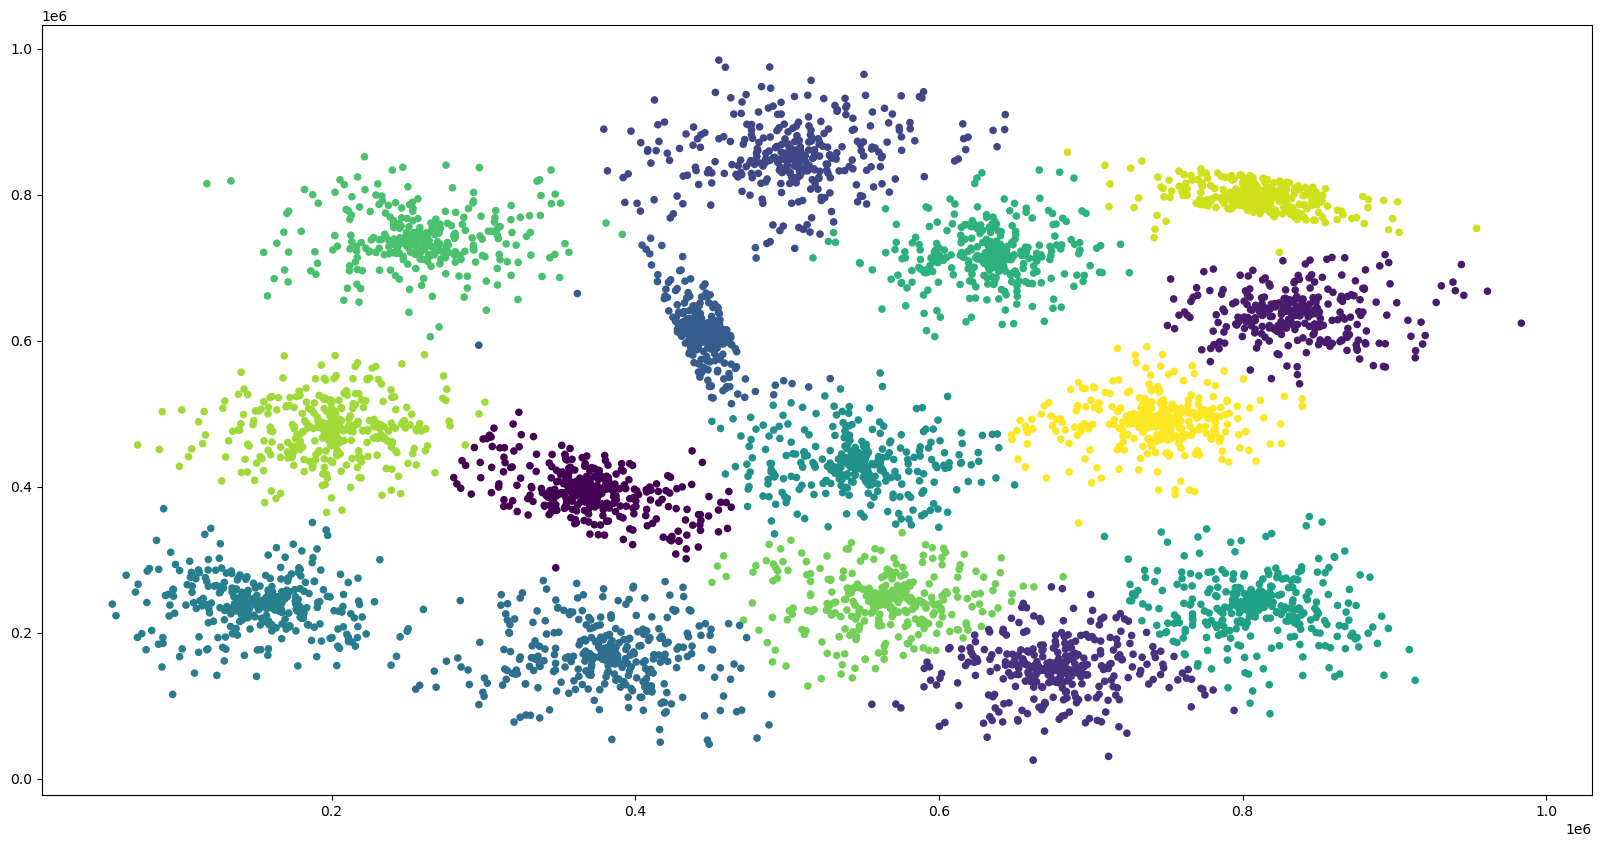

In [21]:
plt.figure(figsize=(20,10))
plt.scatter(TD_gaussDf['x'], TD_gaussDf['y'], s =20, c = y_pred)
plt.show()

**Exercise 3**

In [22]:
import os
directory = 'data/T-newsgroups'

files = os.listdir(directory)
docs = []
for file in files:
    with open(os.path.join(directory, file), 'r') as f:
        docs.append(f.read())

In [23]:
docs[0]

'\n\nI have seen a fair bit of traffic recently concerning Epilepsy and\nseizures.  I am also interested in this subject -- I have a son with\nEpilepsy and I am very active with the local association.  I posted a\nmessage like this a few months ago and received no replies, but here it\nis again.\n\nIs anyone interested in participating in a mailing list on Epilepsy and\nseizures?  This would allow us to hold discussions and share\ninformation via electronic mail.  I already run a Listserver for two\nother groups, so the mechanics would be easy.\n\nIf you are interested, mail me a note.  If I get enough replies, I will\nmake it happen and provide you with the details.\n\nBTW, I have also started a database on Epilepsy.  This is part of my\nresearch on natural language question answering systems.  Users of this\nservice are able to ask questions about Epilepsy and the program\nsearches the database and retrieves its best response.  The technology\nworks by comparing your question against

In [24]:
import string

#remove puntuation. Docs is a list of string (each string is a document)
def rmvPunt(docs):
    newDocs = []
    for doc in docs:
        for punct in string.punctuation+'\n\t':
              doc = doc.replace(punct, " ")
        newDocs.append(doc)
    return newDocs

In [25]:
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords as sw
from nltk.tokenize import RegexpTokenizer

class LemmaTokenizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()

    def __call__(self, document):
        lemmas = []
        tokenizer = RegexpTokenizer(r'\b[a-zA-Z]+\b')
        for t in tokenizer.tokenize(document):
            if t not in string.punctuation:
                t = t.strip()
                lemma = self.lemmatizer.lemmatize(t)
                lemmas.append(lemma)
        return lemmas


lemmaTokenizer = LemmaTokenizer()
vectorizer = TfidfVectorizer(tokenizer=lemmaTokenizer, stop_words=sw.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jacop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\b[a-zA-Z]+\b')
tokenizer.tokenize('ciao tu, pro2a le prova89 8prova')

['ciao', 'tu', 'le']

Esempio di WordCloud con testo semplice

In [27]:
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?']
corpus = rmvPunt(corpus)
corpus

['This is the first document ',
 'This document is the second document ',
 'And this is the third one ',
 'Is this the first document ']

In [28]:
nltk.download('omw-1.4')
nltk.download('wordnet')
tfidf_X = vectorizer.fit_transform(corpus)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jacop\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jacop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\jacop\anaconda3\envs\dslab\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  warnings.warn(


In [29]:
feature_names = vectorizer.get_feature_names_out()
print(feature_names)

['document' 'first' 'one' 'second' 'third']


In [30]:
import pandas as pd
import numpy as np

dense = tfidf_X.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)
y = np.array([1,21,4,1])
ind = y == 1
print(ind)
df

[ True False False  True]


document     first       one    second     third
0  0.629228  0.777221  0.000000  0.000000  0.000000
1  0.787223  0.000000  0.000000  0.616668  0.000000
2  0.000000  0.000000  0.707107  0.000000  0.707107
3  0.629228  0.777221  0.000000  0.000000  0.000000

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(df.T.sum(axis=1))
plt.figure(figsize=(30, 20))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Ritorno all'esercizio principale

In [32]:
tfidf_X = vectorizer.fit_transform(docs)
#tfidf_X = vectorizer.fit_transform(corpus)
#tfidf_X = vectorizer.fit_transform([corpus[0]])
#tfidf_X = vectorizer.fit_transform([docs[0]])

In [33]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 20)
y_pred = km.fit_predict(tfidf_X)

In [34]:
from sklearn.metrics import silhouette_score
silhouette_score(tfidf_X, y_pred)

0.011391926341578512

In [35]:
feature_names = vectorizer.get_feature_names_out()
print(feature_names)

['aa' 'aaa' 'aaaaarrrrgh' ... 'zzz' 'zzzzzz' 'zzzzzzt']


In [36]:
import pandas as pd
dense = tfidf_X[y_pred == 6].todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)
df.T.sum(axis=1).sort_values(ascending = False).head(10)

patient      9.576635
disease      9.326363
dyer         8.364333
yeast        7.881240
doctor       7.831772
infection    7.047391
candida      6.605085
spdcc        6.485274
edu          5.818366
quack        5.613861
dtype: float64

In [37]:
for clust in range(20):
    dense = tfidf_X[y_pred == clust].todense()
    lst1 = dense.tolist()
    df = pd.DataFrame(lst1, columns=feature_names)
    print(df.T.sum(axis=1).sort_values(ascending = False).head(5))
    print()

indiana       6.248108
ucs           2.379719
edu           2.226751
journalism    2.162543
psygate       1.900842
dtype: float64

msg           16.383840
food           8.359245
chinese        4.540003
restaurant     3.191659
glutamate      2.357654
dtype: float64

stratus    22.273550
com        11.713906
sw         10.453245
cdt        10.210780
rocket      7.170622
dtype: float64

game        35.686415
team        14.180106
run         12.205553
win          9.902128
baseball     8.786493
dtype: float64

player    16.209443
year      14.552168
hit       11.502271
edu        8.868017
good       8.758700
dtype: float64

fbi       20.163722
fire      17.526956
wa        15.162560
batf      13.962048
koresh    12.139361
dtype: float64

patient    9.576635
disease    9.326363
dyer       8.364333
yeast      7.881240
doctor     7.831772
dtype: float64

space     20.263896
nasa      18.406284
gov       14.529266
alaska    11.611109
edu        7.085988
dtype: float64

sky        8.605140
ed

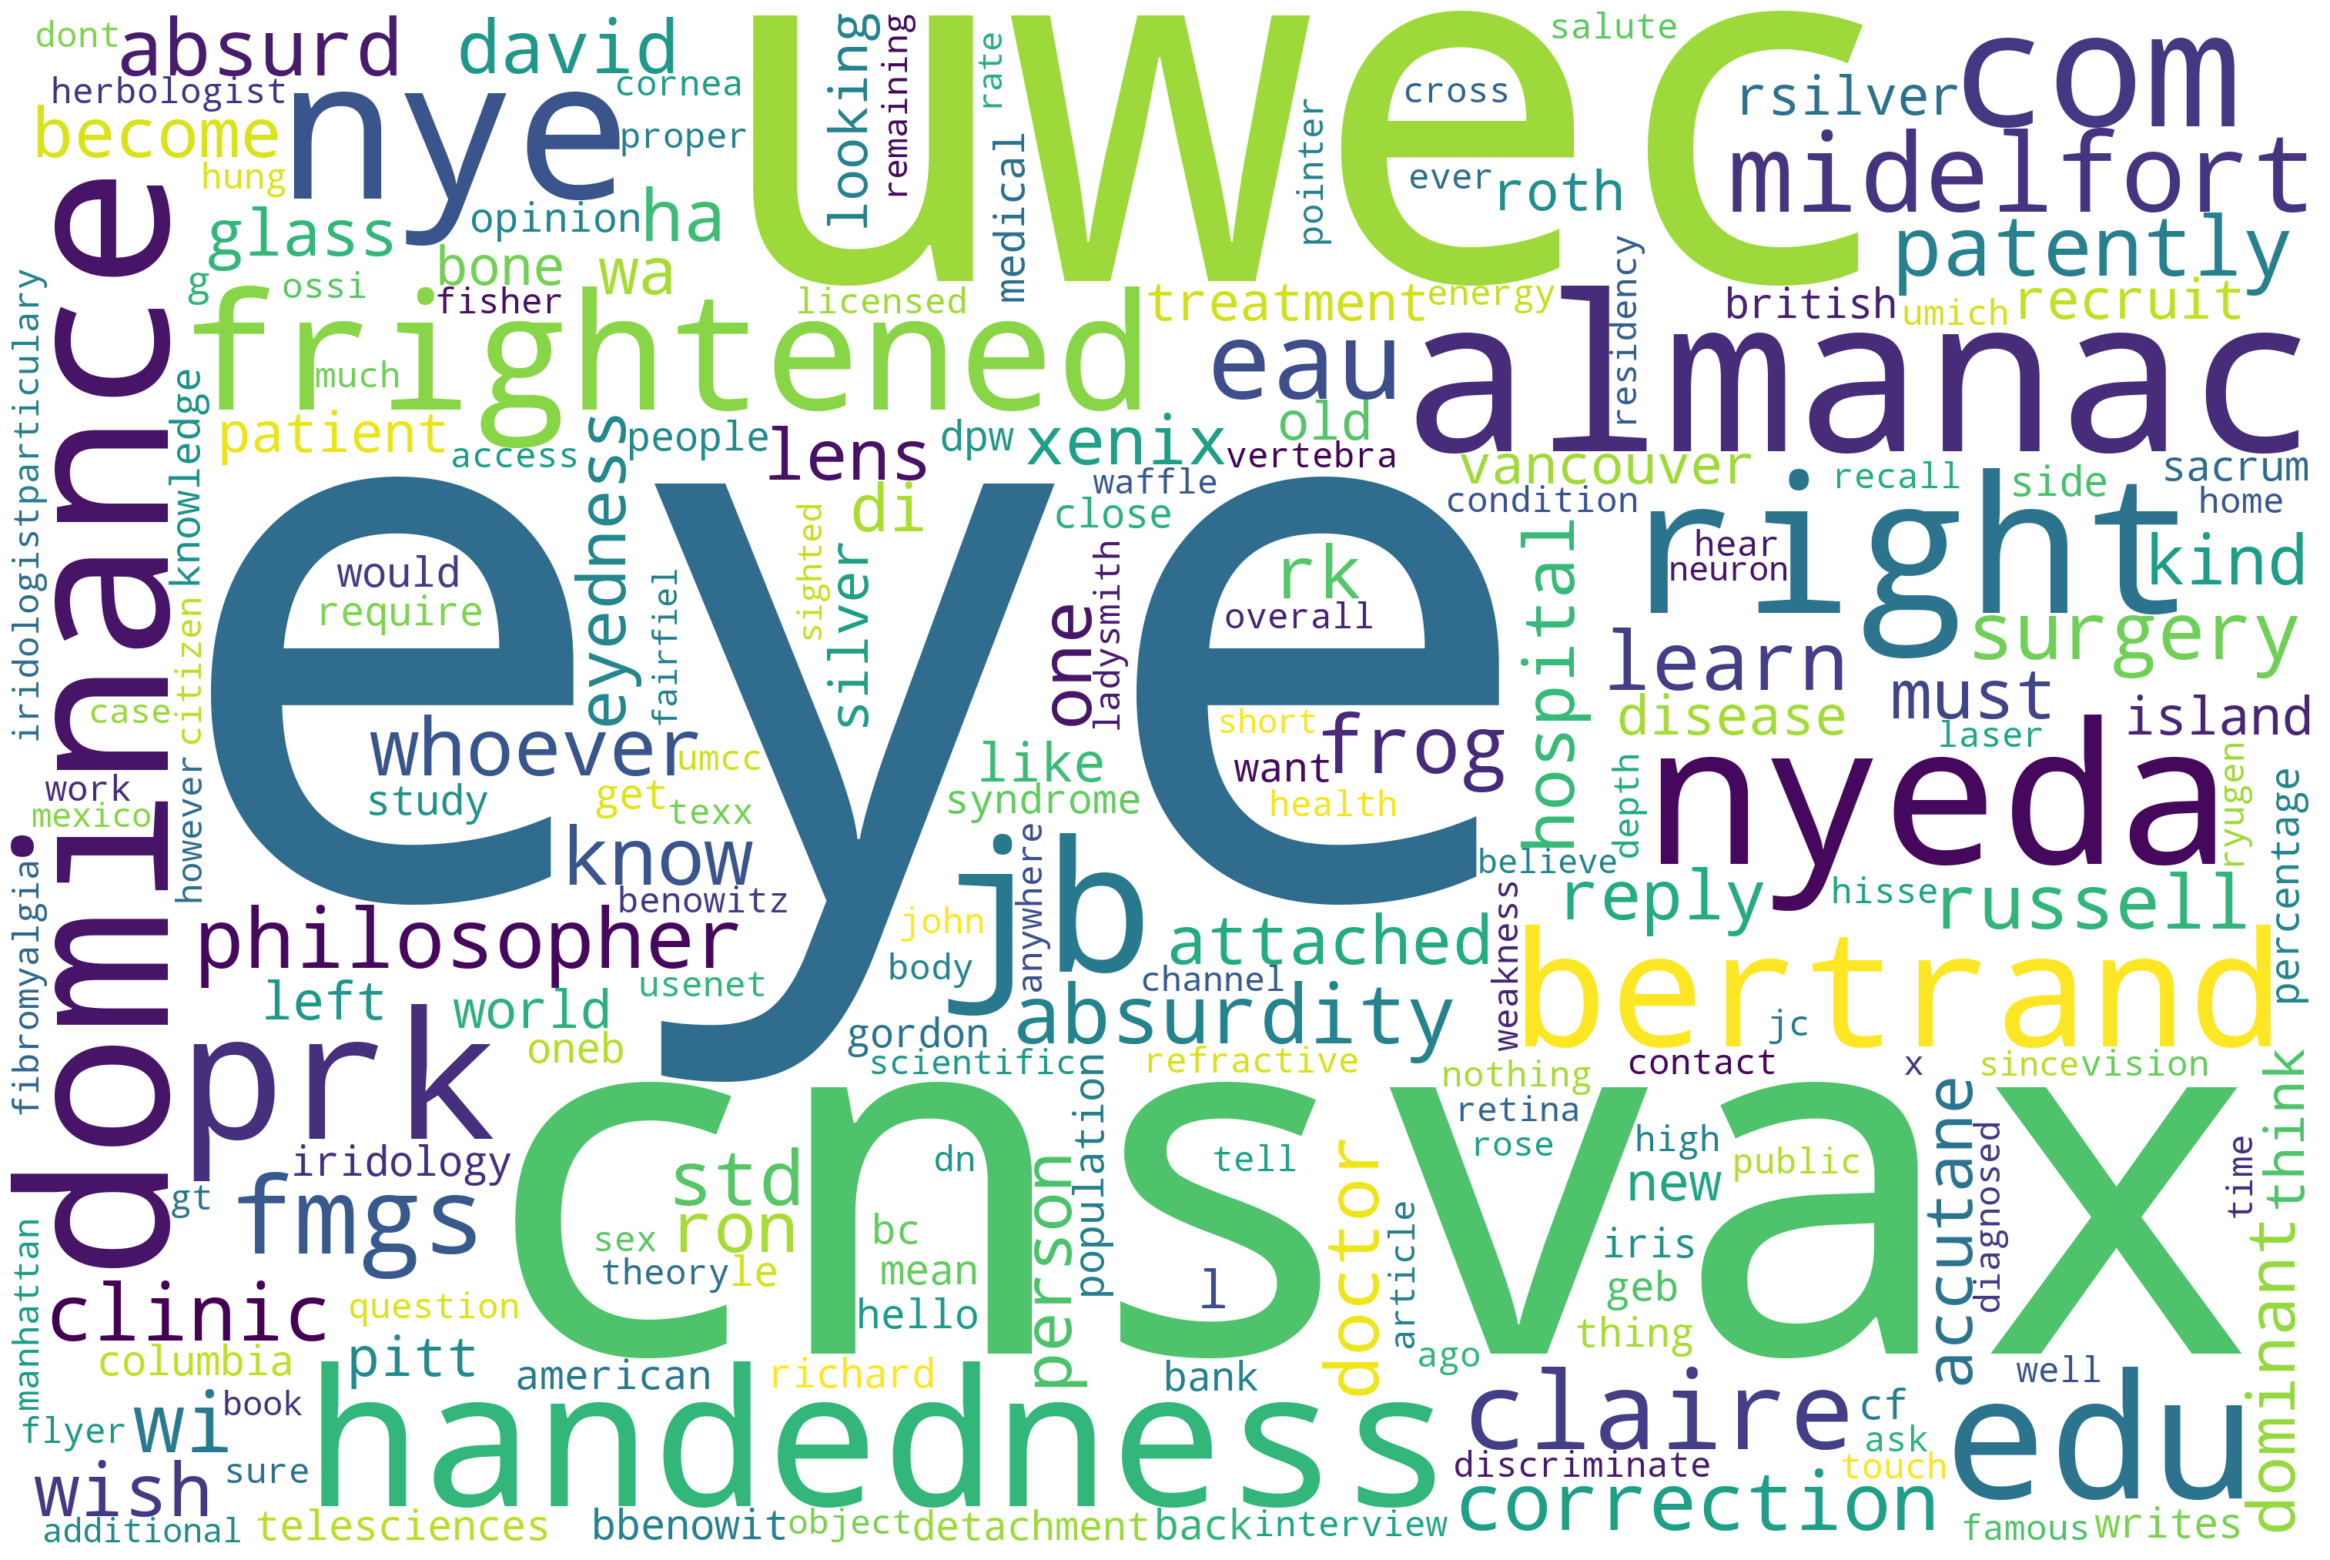

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 3000, height = 2000,background_color='white')
wordcloud.generate_from_frequencies(df.T.sum(axis=1))

plt.figure(figsize=(30, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()